In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import OneHotEncoder
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from tqdm import tqdm

In [2]:
PATH = r"CreditTraining.csv"
df = pd.read_csv(PATH)
#df_h = df.set_index(['charge', 'duration'])
df

,Id_Customer,Y,Customer_Type,BirthDate,Customer_Open_Date,P_Client,Educational_Level,Marital_Status,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Sub_Category,Prod_Decision_Date,Source,Type_Of_Residence,Nb_Of_Products,Prod_Closed_Date,Prod_Category
0,7440,0,Non Existing Client,07/08/1977,13/02/2012,NP_Client,University,Married,3.0,1,36,1.0,C,14/02/2012,Sales,Owned,1,NaN,B
1,573,0,Existing Client,13/06/1974,04/02/2009,P_Client,University,Married,0.0,12,18,2.0,C,30/06/2011,Sales,Parents,1,NaN,G
2,9194,0,Non Existing Client,07/11/1973,03/04/2012,NP_Client,University,Married,2.0,10,36,1.0,C,04/04/2012,Sales,Owned,1,NaN,B
3,3016,1,Existing Client,08/07/1982,25/08/2011,NP_Client,University,Married,3.0,3,36,1.0,C,07/09/2011,Sales,New rent,1,31/12/2012,L
4,6524,0,Non Existing Client,18/08/1953,10/01/2012,NP_Client,University,Married,2.0,1,36,1.0,C,11/01/2012,Sales,Owned,1,NaN,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,5389,0,Non Existing Client,09/04/1976,19/10/2011,NP_Client,University,Married,2.0,1,36,1.0,G,25/11/2011,Sales,Owned,1,NaN,C
5376,1358,1,Existing Client,27/05/1982,22/06/2011,NP_Client,University,Married,3.0,15,"24,816",1.0,C,11/07/2011,Sales,Owned,1,31/10/2012,L
5377,2502,0,Non Existing Client,19/10/1950,15/08/2011,NP_Client,University,Divorced,0.0,14,"14,4",30.0,C,16/08/2011,Branch,Old rent,1,31/03/2013,B
5378,6712,0,Non Existing Client,01/08/1983,15/01/2012,NP_Client,University,Married,1.0,1,36,1.0,G,19/01/2012,Sales,Owned,1,NaN,C


In [67]:
df.dtypes

Id_Customer              int64
Y                        int64
Customer_Type           object
BirthDate               object
Customer_Open_Date      object
P_Client                object
Educational_Level       object
Marital_Status          object
Number_Of_Dependant    float64
Years_At_Residence       int64
Net_Annual_Income       object
Years_At_Business      float64
Prod_Sub_Category       object
Prod_Decision_Date      object
Source                  object
Type_Of_Residence       object
Nb_Of_Products           int64
Prod_Closed_Date        object
Prod_Category           object
dtype: object

In [3]:
def date_to_numerical(value):
    try:
        g = [int(a) for a in value.split("/")[::-1]]
        return datetime.datetime(*g).toordinal()
    except:
        return 0

def add_suffix(value):
    return (value+"sub")
    

df["BirthDate"] = df["BirthDate"].apply(date_to_numerical)
df["Customer_Open_Date"] = df["Customer_Open_Date"].apply(date_to_numerical)
df["Prod_Decision_Date"] = df["Prod_Decision_Date"].apply(date_to_numerical)
df["Prod_Closed_Date"] = df["Prod_Closed_Date"].apply(date_to_numerical)
df["Prod_Sub_Category"] = df["Prod_Sub_Category"].apply(add_suffix)
df


,Id_Customer,Y,Customer_Type,BirthDate,Customer_Open_Date,P_Client,Educational_Level,Marital_Status,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Sub_Category,Prod_Decision_Date,Source,Type_Of_Residence,Nb_Of_Products,Prod_Closed_Date,Prod_Category
0,7440,0,Non Existing Client,721938,734546,NP_Client,University,Married,3.0,1,36,1.0,Csub,734547,Sales,Owned,1,0,B
1,573,0,Existing Client,720787,733442,P_Client,University,Married,0.0,12,18,2.0,Csub,734318,Sales,Parents,1,0,G
2,9194,0,Non Existing Client,720569,734596,NP_Client,University,Married,2.0,10,36,1.0,Csub,734597,Sales,Owned,1,0,B
3,3016,1,Existing Client,723734,734374,NP_Client,University,Married,3.0,3,36,1.0,Csub,734387,Sales,New rent,1,734868,L
4,6524,0,Non Existing Client,713183,734512,NP_Client,University,Married,2.0,1,36,1.0,Csub,734513,Sales,Owned,1,0,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,5389,0,Non Existing Client,721453,734429,NP_Client,University,Married,2.0,1,36,1.0,Gsub,734466,Sales,Owned,1,0,C
5376,1358,1,Existing Client,723692,734310,NP_Client,University,Married,3.0,15,"24,816",1.0,Csub,734329,Sales,Owned,1,734807,L
5377,2502,0,Non Existing Client,712149,734364,NP_Client,University,Divorced,0.0,14,"14,4",30.0,Csub,734365,Branch,Old rent,1,734958,B
5378,6712,0,Non Existing Client,724123,734517,NP_Client,University,Married,1.0,1,36,1.0,Gsub,734521,Sales,Owned,1,0,C


In [4]:
df = df.join(pd.get_dummies(df.pop('Customer_Type')))
df = df.join(pd.get_dummies(df.pop('Marital_Status')))
df = df.join(pd.get_dummies(df.pop('P_Client')))
df = df.join(pd.get_dummies(df.pop('Educational_Level')))
df = df.join(pd.get_dummies(df.pop('Prod_Sub_Category')))
df = df.join(pd.get_dummies(df.pop('Type_Of_Residence')))
df = df.join(pd.get_dummies(df.pop('Prod_Category')))
df = df.join(pd.get_dummies(df.pop('Source')))

df

,Id_Customer,Y,BirthDate,Customer_Open_Date,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Decision_Date,Nb_Of_Products,...,F,G,H,I,J,K,L,M,Branch,Sales
0,7440,0,721938,734546,3.0,1,36,1.0,734547,1,...,0,0,0,0,0,0,0,0,0,1
1,573,0,720787,733442,0.0,12,18,2.0,734318,1,...,0,1,0,0,0,0,0,0,0,1
2,9194,0,720569,734596,2.0,10,36,1.0,734597,1,...,0,0,0,0,0,0,0,0,0,1
3,3016,1,723734,734374,3.0,3,36,1.0,734387,1,...,0,0,0,0,0,0,1,0,0,1
4,6524,0,713183,734512,2.0,1,36,1.0,734513,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,5389,0,721453,734429,2.0,1,36,1.0,734466,1,...,0,0,0,0,0,0,0,0,0,1
5376,1358,1,723692,734310,3.0,15,"24,816",1.0,734329,1,...,0,0,0,0,0,0,1,0,0,1
5377,2502,0,712149,734364,0.0,14,"14,4",30.0,734365,1,...,0,0,0,0,0,0,0,0,1,0
5378,6712,0,724123,734517,1.0,1,36,1.0,734521,1,...,0,0,0,0,0,0,0,0,0,1


In [5]:
def myfloat(float_string):
    """It takes a float string ("1,23" or "1,234.567.890") and
    converts it to floating point number (1.23 or 1.234567890).
    """
    float_string = str(float_string)
    errormsg = "ValueError: Input must be decimal or integer string"
    try:
        if float_string.count(".") == 1 and float_string.count(",") == 0:
            return float(float_string)
        else:
            midle_string = list(float_string)
            while midle_string.count(".") != 0:
                midle_string.remove(".")
            out_string = str.replace("".join(midle_string), ",", ".")
        return float(out_string)
    except: 
        print("%s\n%s" %(errormsg, error))
        return None

df["Net_Annual_Income"] = df["Net_Annual_Income"].apply(myfloat)
df

,Id_Customer,Y,BirthDate,Customer_Open_Date,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Decision_Date,Nb_Of_Products,...,F,G,H,I,J,K,L,M,Branch,Sales
0,7440,0,721938,734546,3.0,1,36.000,1.0,734547,1,...,0,0,0,0,0,0,0,0,0,1
1,573,0,720787,733442,0.0,12,18.000,2.0,734318,1,...,0,1,0,0,0,0,0,0,0,1
2,9194,0,720569,734596,2.0,10,36.000,1.0,734597,1,...,0,0,0,0,0,0,0,0,0,1
3,3016,1,723734,734374,3.0,3,36.000,1.0,734387,1,...,0,0,0,0,0,0,1,0,0,1
4,6524,0,713183,734512,2.0,1,36.000,1.0,734513,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,5389,0,721453,734429,2.0,1,36.000,1.0,734466,1,...,0,0,0,0,0,0,0,0,0,1
5376,1358,1,723692,734310,3.0,15,24.816,1.0,734329,1,...,0,0,0,0,0,0,1,0,0,1
5377,2502,0,712149,734364,0.0,14,14.400,30.0,734365,1,...,0,0,0,0,0,0,0,0,1,0
5378,6712,0,724123,734517,1.0,1,36.000,1.0,734521,1,...,0,0,0,0,0,0,0,0,0,1


In [6]:
df = df.dropna(axis=0)
df

,Id_Customer,Y,BirthDate,Customer_Open_Date,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Decision_Date,Nb_Of_Products,...,F,G,H,I,J,K,L,M,Branch,Sales
0,7440,0,721938,734546,3.0,1,36.000,1.0,734547,1,...,0,0,0,0,0,0,0,0,0,1
1,573,0,720787,733442,0.0,12,18.000,2.0,734318,1,...,0,1,0,0,0,0,0,0,0,1
2,9194,0,720569,734596,2.0,10,36.000,1.0,734597,1,...,0,0,0,0,0,0,0,0,0,1
3,3016,1,723734,734374,3.0,3,36.000,1.0,734387,1,...,0,0,0,0,0,0,1,0,0,1
4,6524,0,713183,734512,2.0,1,36.000,1.0,734513,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,5389,0,721453,734429,2.0,1,36.000,1.0,734466,1,...,0,0,0,0,0,0,0,0,0,1
5376,1358,1,723692,734310,3.0,15,24.816,1.0,734329,1,...,0,0,0,0,0,0,1,0,0,1
5377,2502,0,712149,734364,0.0,14,14.400,30.0,734365,1,...,0,0,0,0,0,0,0,0,1,0
5378,6712,0,724123,734517,1.0,1,36.000,1.0,734521,1,...,0,0,0,0,0,0,0,0,0,1


In [72]:
df.dtypes

Id_Customer              int64
Y                        int64
BirthDate                int64
Customer_Open_Date       int64
Number_Of_Dependant    float64
Years_At_Residence       int64
Net_Annual_Income      float64
Years_At_Business      float64
Prod_Decision_Date       int64
Nb_Of_Products           int64
Prod_Closed_Date         int64
Existing Client          uint8
Non Existing Client      uint8
Divorced                 uint8
Married                  uint8
Separated                uint8
Single                   uint8
Widowed                  uint8
NP_Client                uint8
P_Client                 uint8
Diploma                  uint8
Master/PhD               uint8
Secondary or Less        uint8
University               uint8
Csub                     uint8
Gsub                     uint8
Psub                     uint8
Company                  uint8
New rent                 uint8
Old rent                 uint8
Owned                    uint8
Parents                  uint8
A       

In [73]:
corr = df.corr()

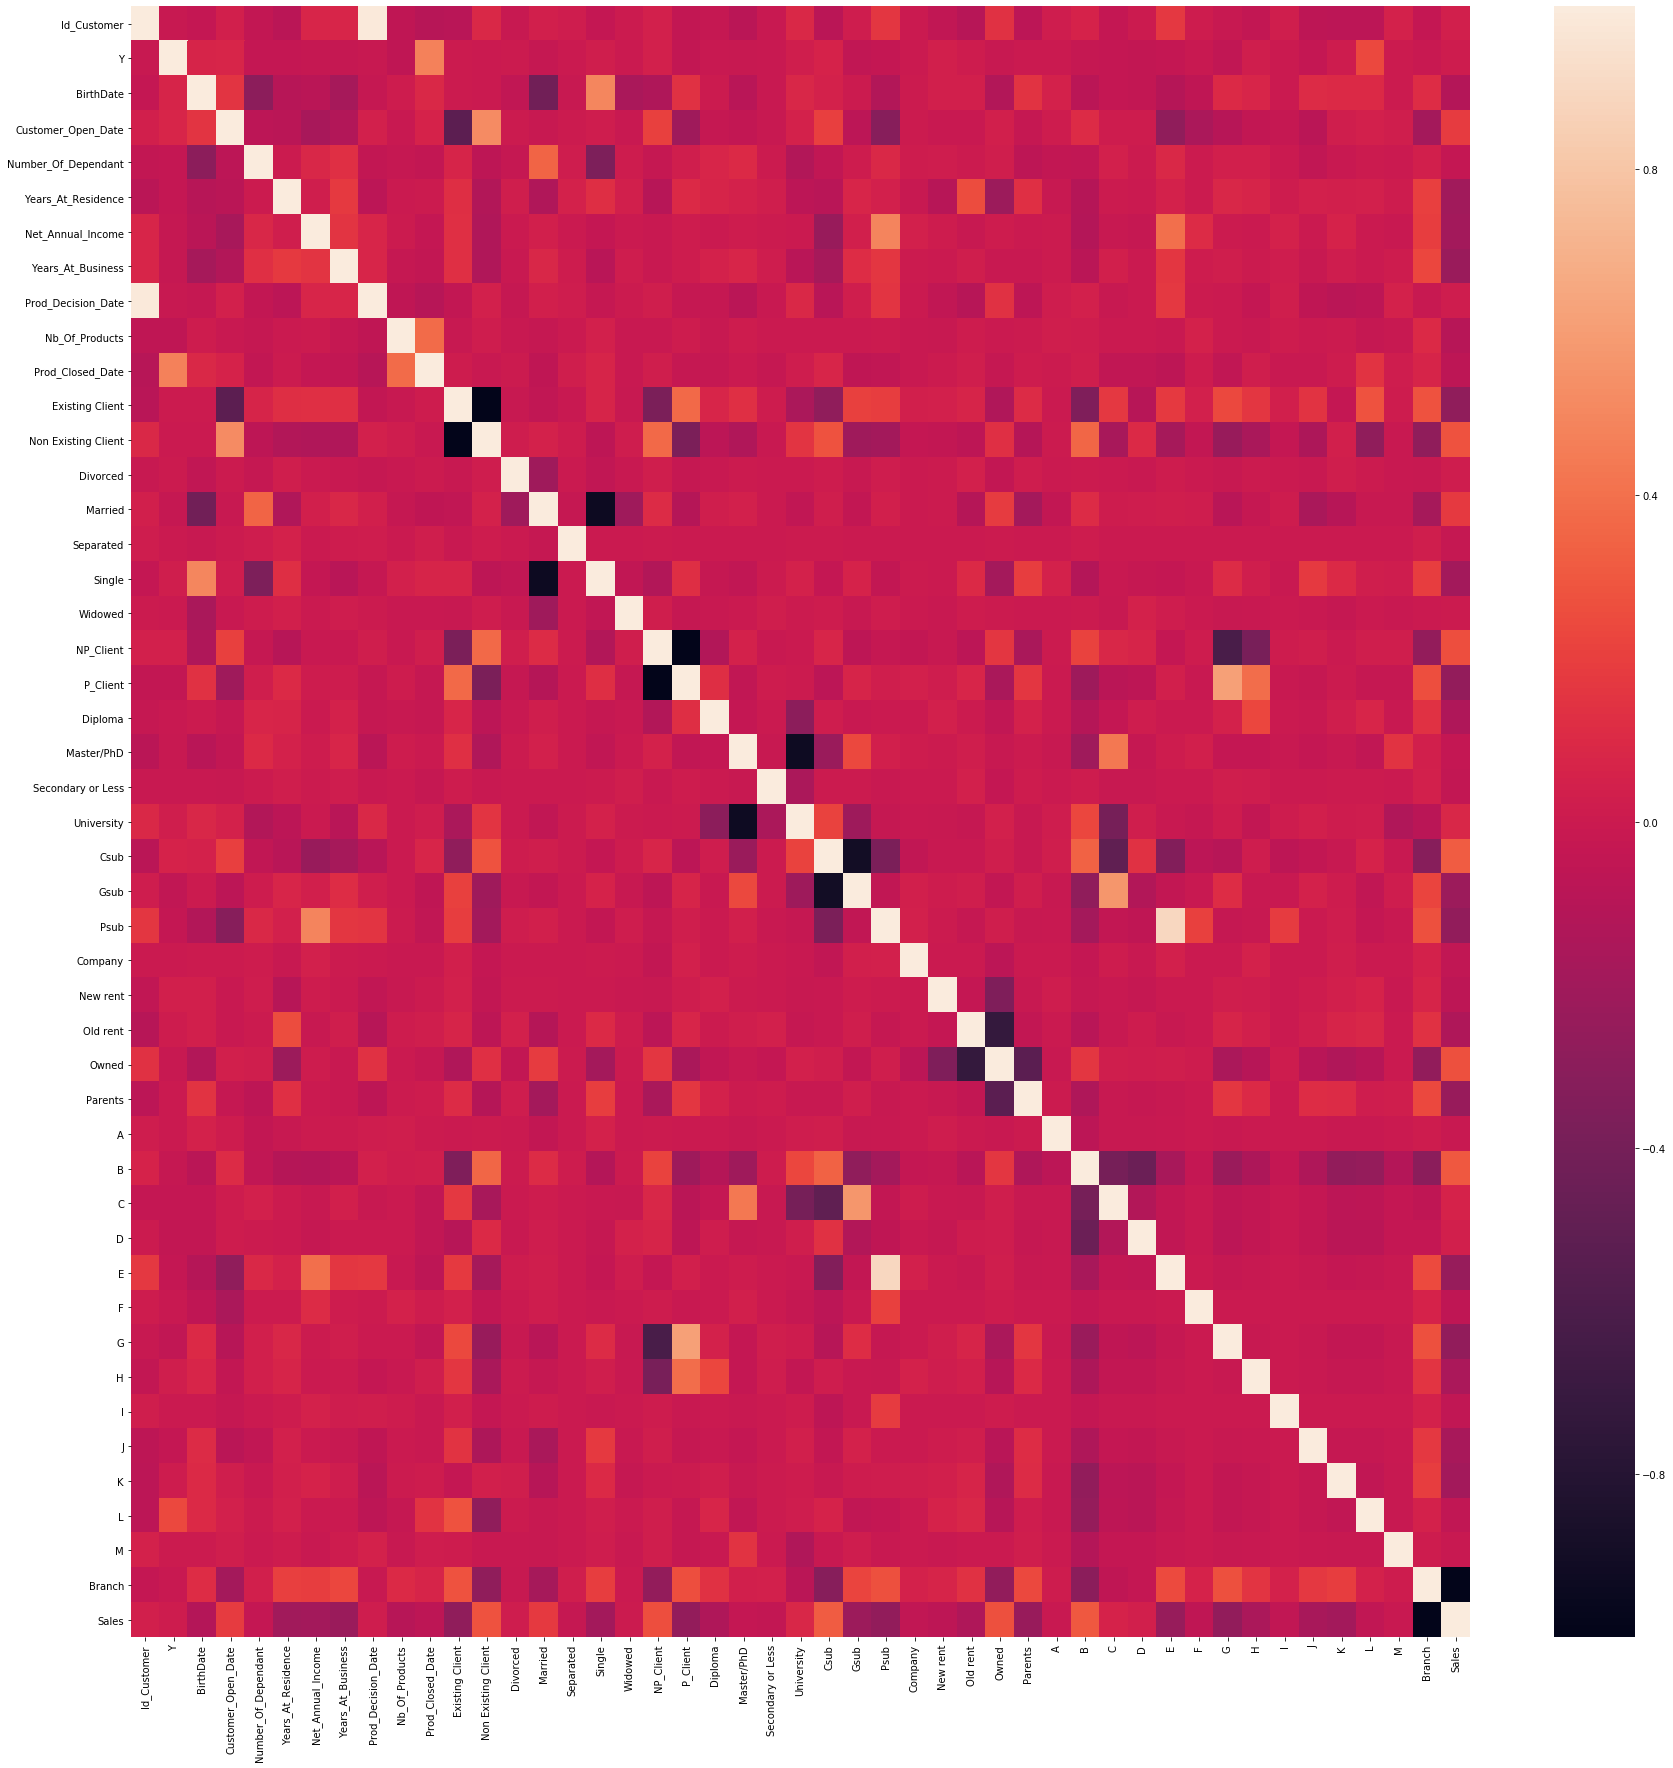

In [74]:
fig = plt.figure(figsize=(30,30))

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [7]:
# approx 10 percent of data test
test = pd.concat([df[df["Y"]==1].sample(100),df[df["Y"]==0].sample(100)])

test


,Id_Customer,Y,BirthDate,Customer_Open_Date,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Decision_Date,Nb_Of_Products,...,F,G,H,I,J,K,L,M,Branch,Sales
5072,8320,1,719110,734569,0.0,1,36.0,10.0,734570,1,...,0,0,0,0,0,0,0,0,0,1
3487,1450,1,722592,734321,0.0,1,36.0,1.0,734325,1,...,0,0,0,0,0,0,0,0,1,0
4940,4698,1,723826,734428,1.0,1,36.0,1.0,734470,1,...,0,0,0,0,0,0,0,0,0,1
4387,8200,1,725386,734563,0.0,24,42.0,1.0,734574,1,...,0,0,1,0,0,0,0,0,1,0
260,6493,1,714531,734511,0.0,1,25.0,1.0,734512,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5137,4455,0,720522,734434,2.0,1,36.0,1.0,734439,1,...,0,0,0,0,0,0,0,0,0,1
1840,5951,0,721515,731973,2.0,32,25.0,1.0,734525,1,...,0,0,0,0,0,0,0,0,0,1
3426,4022,0,723304,734412,0.0,15,50.0,1.0,734415,1,...,0,0,0,0,0,0,0,0,0,1
1898,1650,0,714285,734337,3.0,35,36.0,1.0,734341,1,...,0,0,0,0,0,0,0,0,0,1


In [8]:
train_pre = df.drop(test.index)
train_pre
print(len(train_pre[train_pre["Y"]==1]))
print(len(train_pre[train_pre["Y"]==0]))

292
4882


In [9]:
h = train_pre[train_pre["Y"] == 1]
train = pd.concat([train_pre, h,h,h,h,h,h,h,h,h,h,h,h,h,h,h])
print(len(train[train["Y"]==1]))
print(len(train[train["Y"]==0]))

4672
4882


In [78]:
len(train)

9390

In [10]:
print(len(train[train["Y"]==1]))
print(len(train[train["Y"]==0]))

4672
4882


In [11]:
len(train.drop(test.index))

KeyError: '[5072 3487 4940 4387 260 2704 4144 5122 1342 2602 2738 287 4902 331 2207\n 5371 1164 2388 3187 2347 414 2115 1899 4936 585 3372 4358 2192 3591 4154\n 946 3078 291 2514 4223 597 1359 5074 2069 914 456 952 3850 2003 3 1042\n 1612 3485 5198 2915 5265 529 1711 5310 1675 4842 2811 1634 829 683 3900\n 2960 3387 1569 1125 3176 3273 1968 2932 1897 5085 3742 3459 3135 2350\n 3081 99 4332 4110 4158 3040 3250 1608 18 1484 3606 4050 814 1238 1268\n 1580 430 4202 203 3998 807 1327 3651 2897 3800 4374 1263 3499 5024 3414\n 402 1239 2820 1075 1339 1422 3249 2217 392 321 3151 4053 3864 1684 1407\n 1163 3257 5157 3448 4157 917 1948 2382 695 820 4687 3560 5365 3309 4032\n 1946 4775 288 1478 5186 4852 1265 4874 2339 325 4591 3155 4636 4708 795\n 1877 199 5033 4701 1530 3449 2434 2663 3219 2168 2553 4532 439 1531 3166\n 4313 3961 1341 1798 3551 1895 4462 2240 1275 2976 837 2376 3624 1724 490\n 70 1285 2322 4425 2817 472 3552 2978 1956 612 2826 2756 4346 5336 4884\n 5137 1840 3426 1898 1138] not found in axis'

In [12]:
train_y = train.pop("Y")
test_y = test.pop("Y")


In [13]:
X_train= np.array(train.loc[:])
y_train=  np.array(train_y.loc[:])

X_test= np.array(test.loc[:])
y_test=  np.array(test_y.loc[:])


In [85]:
train_y = train_pre.pop("Y")


In [86]:
X_train= np.array(train_pre.loc[:])
y_train=  np.array(train_y.loc[:])


In [107]:
X= np.array(df.loc[:])
y=  np.array(target.loc[:])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

NameError: name 'target' is not defined

In [88]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler().fit(X_train)

In [89]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[0.77459656, 0.99334047, 0.99990063, ..., 0.        , 0.        ,
        1.        ],
       [0.05965643, 0.99175677, 0.99839781, ..., 0.        , 0.        ,
        1.        ],
       [0.95720979, 0.99145681, 0.99996869, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.26048933, 0.97987143, 0.99965288, ..., 0.        , 1.        ,
        0.        ],
       [0.69880271, 0.99634689, 0.99986115, ..., 0.        , 0.        ,
        1.        ],
       [0.45070276, 0.99575111, 0.99973728, ..., 0.        , 0.        ,
        1.        ]])

In [90]:
# check for nan or nulls
print(np.where(np.isnan(X_train)))
print(np.where(np.isnan(y_train)))

print(np.where(np.isnan(X_test)))
print(np.where(np.isnan(y_test)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64),)
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64),)


In [91]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [92]:
y_pred= model.predict(X_test)
f1 = f1_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(acc)
f1

0.5


0.0

100%|██████████| 99/99 [00:03<00:00, 32.05it/s]
2
0.6666666666666666


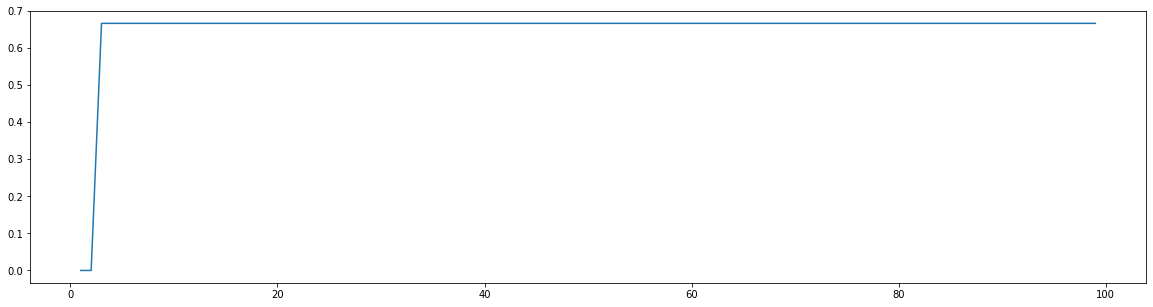

In [93]:
from sklearn.tree import DecisionTreeClassifier


f1s = []

for i in tqdm(range(1,100)):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train,y_train)

    y_pred= model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    f1s.append(f1)

plt.figure(figsize=(20,5))
plt.plot(range(1,100), np.array(f1s))

j = np.array(f1s).argmax()
print(j)
print(f1s[j])


100%|██████████| 99/99 [00:04<00:00, 20.00it/s]
3
0.9253731343283582


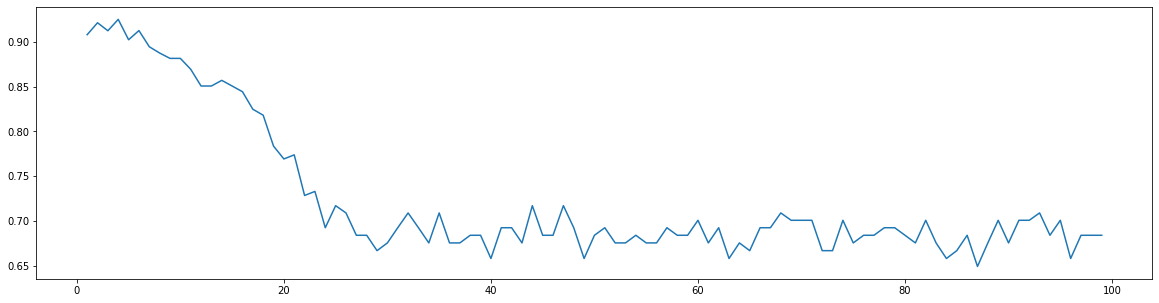

In [18]:
from sklearn.tree import DecisionTreeClassifier


f1s = []

for i in tqdm(range(1,100)):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train,y_train)

    y_pred= model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    f1s.append(f1)

plt.figure(figsize=(20,5))
plt.plot(range(1,100), np.array(f1s))

j = np.array(f1s).argmax()
print(j)
print(f1s[j])

In [152]:
from sklearn.ensemble import RandomForestClassifier


f1s = []

for i in tqdm(range(3,50)):
    model = RandomForestClassifier(n_estimators = 1000, max_depth=i)
    model.fit(X_train,y_train)

    y_pred= model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    #print(f1)
    f1s.append(f1)

plt.figure(figsize=(20,5))
plt.plot(range(3,50), np.array(f1s))

j = np.array(f1s).argmax()
print(j)
print(f1s[j])



 53%|█████▎    | 25/47 [03:10<03:30,  9.58s/it]

In [59]:
y_pred= model.predict(X_test)
f1 = f1_score(y_test, y_pred)
f1

0.423076923076923

In [101]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=16)
model.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

In [102]:
y_pred= model.predict(X_test)
f1 = f1_score(y_test, y_pred)
f1

0.8656716417910448

In [103]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train,y_train)

y_pred= model.predict(X_test)
f1 = f1_score(y_test, y_pred)
f1


0.9108910891089109

In [24]:
y_pred= model.predict(X_test)
f1 = f1_score(y_test, y_pred)
f1


0.9238578680203046

In [104]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=2)
model.fit(X_train,y_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [105]:
y_pred= model.predict(X_test)
f1 = f1_score(y_test, y_pred)
f1

0.5963302752293578

100%|██████████| 50/50 [01:28<00:00,  1.78s/it]
0
0.8979591836734694


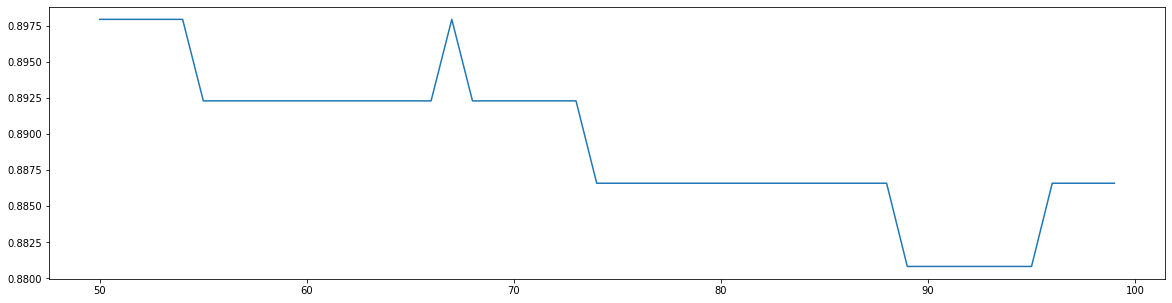

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

f1s = []

for i in tqdm(range(50,100)):
    model = GradientBoostingClassifier(n_estimators=i, max_depth= 3)
    model.fit(X_train,y_train)

    y_pred= model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    #print(f1)
    f1s.append(f1)

plt.figure(figsize=(20,5))
plt.plot(range(50,100), np.array(f1s))

j = np.array(f1s).argmax()
print(j)
print(f1s[j])


In [36]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=14, max_depth=4)
model.fit(X_train,y_train)

y_pred= model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f1)
acc= accuracy_score(y_test, y_pred)
print(acc)

0.9261083743842364
0.925


100%|██████████| 10/10 [00:05<00:00,  1.75it/s]2
0.9215686274509804



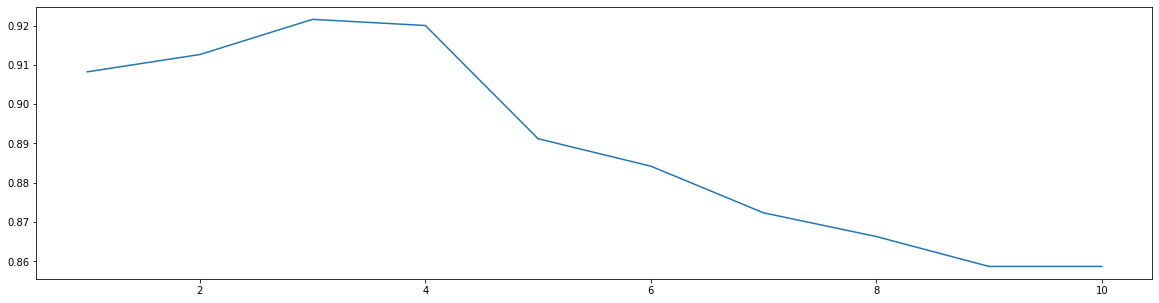

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

f1s = []

for i in tqdm(range(1,11)):
    model = GradientBoostingClassifier(n_estimators=21, max_depth=i)
    model.fit(X_train,y_train)

    y_pred= model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    #print(f1)
    f1s.append(f1)

plt.figure(figsize=(20,5))
plt.plot(range(1,11), np.array(f1s))

j = np.array(f1s).argmax()
print(j)
print(f1s[j])

100%|██████████| 99/99 [01:43<00:00,  1.05s/it]
24
0.9261083743842364


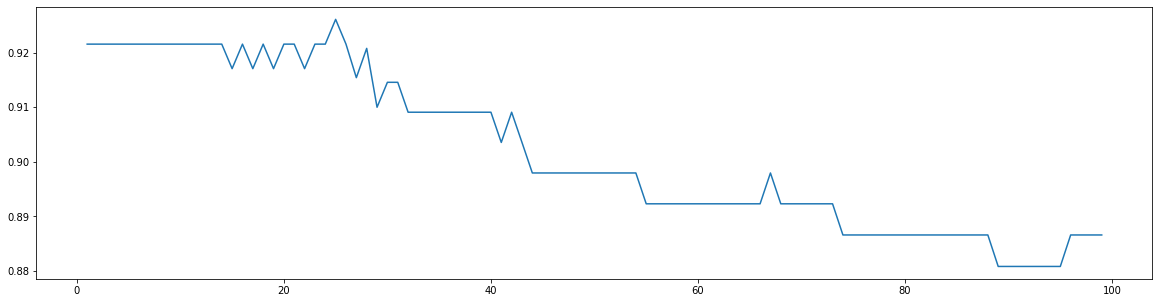

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

f1s = []

for i in tqdm(range(1,100)):
    model = GradientBoostingClassifier(n_estimators=i, max_depth=3)
    model.fit(X_train,y_train)

    y_pred= model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    #print(f1)
    f1s.append(f1)

plt.figure(figsize=(20,5))
plt.plot(range(1,100), np.array(f1s))

j = np.array(f1s).argmax()
print(j)
print(f1s[j])

In [20]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

f1s = []

for i in tqdm(range(1,100)):
    model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators= i)
    model.fit(X_train,y_train)

    y_pred= model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    #print(f1)
    f1s.append(f1)

plt.figure(figsize=(20,5))
plt.plot(range(1,100), np.array(f1s))

j = np.array(f1s).argmax()
print(j)
print(f1s[j])


18%|█▊        | 18/99 [00:01<00:08,  9.21it/s]


KeyboardInterrupt: 

In [37]:
base_model = GradientBoostingClassifier(n_estimators=30, max_depth=3)
base_model.fit(X_train, y_train)

y_pred= base_model.predict(X_test)
f1 = f1_score(y_test, y_pred)

print(f1)


0.9145728643216081


In [55]:
from sklearn.ensemble import AdaBoostClassifier

f1s = []

for i in tqdm(range(10,200,10)):
    model = AdaBoostClassifier(base_estimator=base_model, n_estimators= i)
    model.fit(X_train,y_train)

    y_pred= model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    #print(f1)
    f1s.append(f1)

plt.figure(figsize=(20,5))
plt.plot(range(10,200,10), np.array(f1s))

j = np.array(f1s).argmax()
print(j)
print(f1s[j])

0%|          | 0/19 [00:01<?, ?it/s]


KeyboardInterrupt: 

In [56]:
model = AdaBoostClassifier(base_estimator=base_model, n_estimators= 4)
model.fit(X_train,y_train)

y_pred= model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f1)

0.8831168831168831


### Neural Network

In [1]:
import torch.nn as nn

import torch.nn.functional as F
import torch
from torch.optim import lr_scheduler

from modelsummary import summary
from torchviz import make_dot
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

from torch.utils.data import DataLoader

In [95]:
class NN(nn.Module):
    def __init__(self, hidden1_size, hidden2_size, dropout=None):
        super(NN, self).__init__()

        self.lin = nn.Sequential(
             nn.Linear(46,hidden1_size),
             nn.ReLU(),
             nn.Linear(hidden1_size, hidden2_size),
             nn.ReLU(),
             nn.Linear(hidden2_size,1),
             nn.Sigmoid()
        )

    def forward(self, input):
        return self.lin(input)
    

In [40]:
MLP = NN(300, 100)
f = MLP(torch.ones(1,46))
print(f.item())
print(f.shape)

0.47647029161453247
torch.Size([1, 1])


In [180]:
 g = torch.ones(1,46)
 summary(MLP,g, show_input=False)


-----------------------------------------------------------------------
             Layer (type)               Output Shape         Param #
                 Linear-1                  [-1, 300]          14,100
                   ReLU-2                  [-1, 300]               0
                 Linear-3                  [-1, 100]          30,100
                   ReLU-4                  [-1, 100]               0
                 Linear-5                    [-1, 1]             101
                Sigmoid-6                    [-1, 1]               0
Total params: 44,301
Trainable params: 44,301
Non-trainable params: 0
-----------------------------------------------------------------------


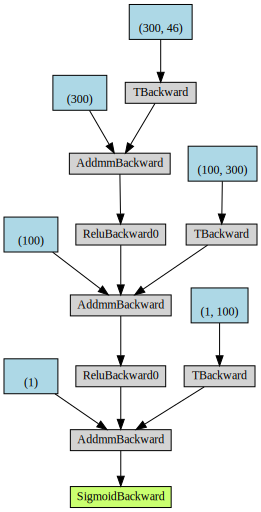

In [131]:
make_dot(f)

In [96]:
from torch.utils.data import Dataset

class batches(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X)
        self.X = self.X.to(dtype = torch.float32)
        self.y = torch.tensor(y)
        self.y = self.y.to(dtype = torch.float32)

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        return (self.X[idx], self.y[idx])


In [97]:
batchs_train = batches(X_train, y_train)
batchs_test = batches(X_test, y_test)

# testing
batchs_train.__getitem__(3)

(tensor([0.6792, 0.9813, 0.9999, 0.1000, 0.0143, 0.0036, 0.0102, 0.9999, 0.3333,
         0.0000, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         1.0000]),
 tensor(0.))

In [98]:
batch_size = 128    

train_loader = DataLoader(batchs_train, batch_size = len(batchs_train), shuffle= True)
test_loader = DataLoader(batchs_test, batch_size = len(batchs_test), shuffle= True)


In [51]:
MLP = NN(375, 100)

losses_train_set = []
losses_validation_set = []
accuracys = []
F1_scores = []
n_epochs = 50
loss_fn = nn.BCELoss()

optimizer = torch.optim.Adam(MLP.parameters(),lr=0.01)
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.01, patience = 10, verbose= True)

for e in range(n_epochs):
        running_loss, validation_loss, accuracy = 0, 0, 0
        i, j =0, 0 
        F1_score = 0

        MLP.train()
        for (data, target) in train_loader:
            optimizer.zero_grad()
            results = MLP(data)
            loss = loss_fn(results, target.to(dtype= torch.float).unsqueeze(1))
            running_loss+=loss.item()

            loss.backward()
            optimizer.step()
            i+=1

        # validation error, accuracy

        with torch.no_grad():
            MLP.eval()
            
            for (data, target) in test_loader:
                results = MLP(data)
                loss = loss_fn(results, target.to(dtype= torch.float).unsqueeze(1))
                validation_loss+=loss.item()  
                target_pred = [int(0) if(a.item() <0.5) else int(1) for a in results.squeeze(0)]

                #print(target_pred)
                target = (target.squeeze(0).to(dtype= torch.int).tolist())
                #print(target)
                F1_score += f1_score(target, target_pred)
                #print(F1_score)
                acc = accuracy_score(target, target_pred)
                accuracy+=acc
                #print(acc)
                j+=1

        running_loss /= i   
        validation_loss /= j
        F1_score /= j   
        accuracy /= j
        message = '\nEpoch: {}/{}. Train loss: {:.4f}'.format(e + 1, n_epochs, running_loss)
        message += '\nEpoch: {}/{}. Validation loss: {:.4f}'.format(e + 1, n_epochs,
                                                                             validation_loss)
        message += '\nEpoch: {}/{}. Accuracy: {:.4f}'.format(e + 1, n_epochs,
                                                                             accuracy)
                                                                             
        message += '\nEpoch: {}/{}. Validation F1:{:.4f}\n'.format(e + 1, n_epochs,
                                                                             F1_score)

        print(message)
        losses_train_set.append(running_loss)
        losses_validation_set.append(validation_loss)
        F1_scores.append(F1_score)
        accuracys.append(accuracy)

        scheduler.step(F1_score)


Epoch: 1/50. Train loss: 0.6928
Epoch: 1/50. Validation loss: 0.6263
Epoch: 1/50. Accuracy: 0.6300
Epoch: 1/50. Validation F1:0.7279


Epoch: 2/50. Train loss: 0.6317
Epoch: 2/50. Validation loss: 0.6336
Epoch: 2/50. Accuracy: 0.5200
Epoch: 2/50. Validation F1:0.0769


Epoch: 3/50. Train loss: 0.6376
Epoch: 3/50. Validation loss: 0.5447
Epoch: 3/50. Accuracy: 0.6000
Epoch: 3/50. Validation F1:0.7143


Epoch: 4/50. Train loss: 0.5736
Epoch: 4/50. Validation loss: 0.4223
Epoch: 4/50. Accuracy: 0.9050
Epoch: 4/50. Validation F1:0.9073


Epoch: 5/50. Train loss: 0.4503
Epoch: 5/50. Validation loss: 0.4396
Epoch: 5/50. Accuracy: 0.8250
Epoch: 5/50. Validation F1:0.8066


Epoch: 6/50. Train loss: 0.4582
Epoch: 6/50. Validation loss: 0.3564
Epoch: 6/50. Accuracy: 0.9000
Epoch: 6/50. Validation F1:0.8980


Epoch: 7/50. Train loss: 0.3877
Epoch: 7/50. Validation loss: 0.3199
Epoch: 7/50. Accuracy: 0.9100
Epoch: 7/50. Validation F1:0.9118


Epoch: 8/50. Train loss: 0.3816
Epoch: 8/50. Validatio

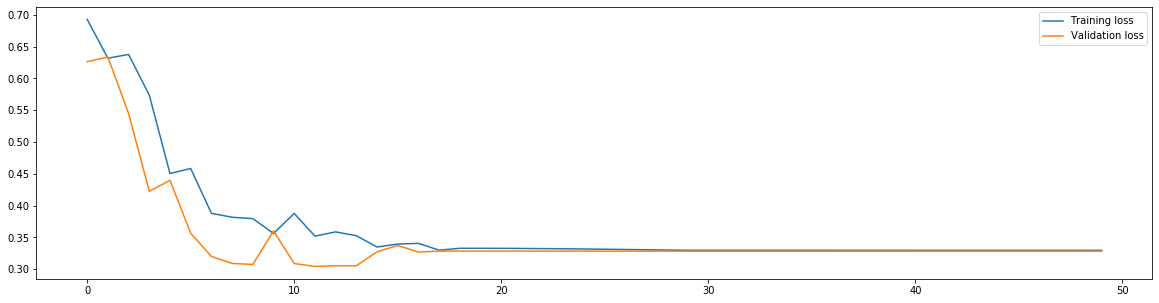

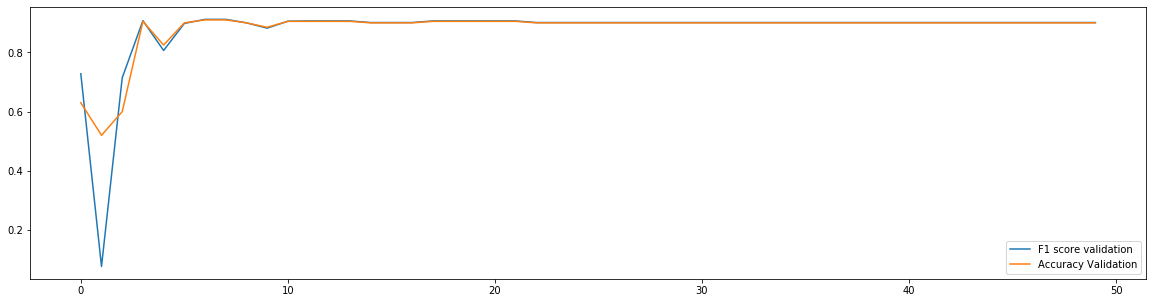

In [52]:
plt.figure(figsize=(20,5))
plt.plot(range(n_epochs), np.array(losses_train_set), label = "Training loss")
plt.plot(range(n_epochs), np.array(losses_validation_set), label = "Validation loss")
plt.legend()

plt.figure(figsize=(20,5))
plt.plot(range(n_epochs), np.array(F1_scores), label = "F1 score validation")
plt.plot(range(n_epochs), np.array(accuracys), label = "Accuracy Validation")
plt.legend()




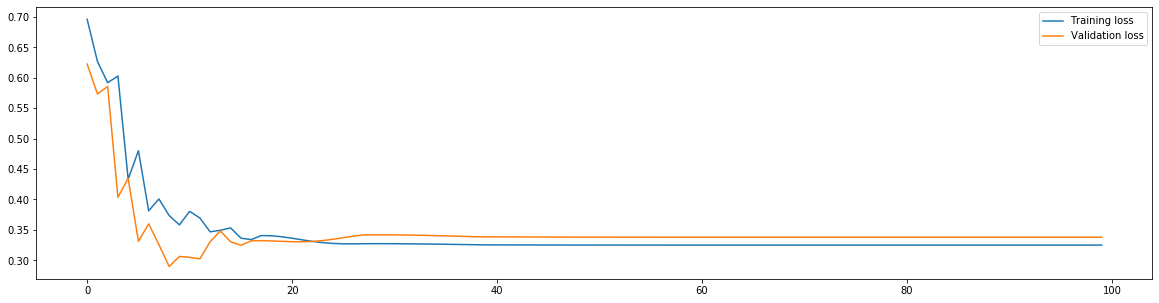

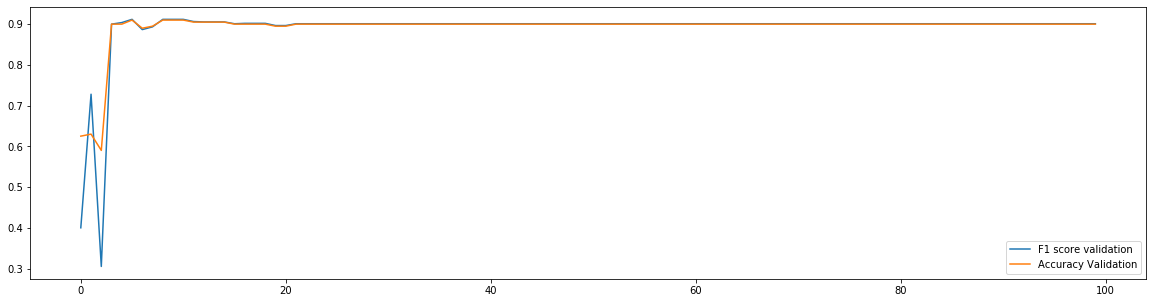

In [72]:
plt.figure(figsize=(20,5))
plt.plot(range(n_epochs), np.array(losses_train_set), label = "Training loss")
plt.plot(range(n_epochs), np.array(losses_validation_set), label = "Validation loss")
plt.legend()

plt.figure(figsize=(20,5))
plt.plot(range(n_epochs), np.array(F1_scores), label = "F1 score validation")
plt.plot(range(n_epochs), np.array(accuracys), label = "Accuracy Validation")
plt.legend()


In [100]:
MLP2 = NN(375, 100)

losses_train_set = []
losses_validation_set = []
accuracys = []
F1_scores = []
n_epochs = 100

class Loss(nn.Module):
    def __init__(self):
        super(Loss, self).__init__()

    def forward(self, result1, result2):
        d = -(0.05*result2*torch.log(result1) +0.95*(1-result2)*torch.log(1-result1)).mean()
        return d

loss_fn = Loss()

optimizer = torch.optim.Adam(MLP2.parameters(),lr=0.01)
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.1, patience = 10, verbose= True)

for e in range(n_epochs):
        running_loss, validation_loss, accuracy = 0, 0, 0
        i, j =0, 0 
        F1_score = 0

        MLP2.train()
        for (data, target) in train_loader:
            optimizer.zero_grad()
            results = MLP2(data)
            loss = loss_fn(results, target.to(dtype= torch.float).unsqueeze(1))
            running_loss+=loss.item()

            loss.backward()
            optimizer.step()
            i+=1

        # validation error, accuracy

        with torch.no_grad():
            MLP2.eval()
            
            for (data, target) in test_loader:
                results = MLP2(data)
                loss = loss_fn(results, target.to(dtype= torch.float).unsqueeze(1))
                validation_loss+=loss.item()  
                target_pred = [int(0) if(a.item() <0.5) else int(1) for a in results.squeeze(0)]

                #print(target_pred)
                target = (target.squeeze(0).to(dtype= torch.int).tolist())
                #print(target)
                F1_score += f1_score(target, target_pred)
                #print(F1_score)
                acc = accuracy_score(target, target_pred)
                accuracy+=acc
                #print(acc)
                j+=1

        running_loss /= i   
        validation_loss /= j
        F1_score /= j   
        accuracy /= j
        message = '\nEpoch: {}/{}. Train loss: {:.4f}'.format(e + 1, n_epochs, running_loss)
        message += '\nEpoch: {}/{}. Validation loss: {:.4f}'.format(e + 1, n_epochs,
                                                                             validation_loss)
        message += '\nEpoch: {}/{}. Accuracy: {:.4f}'.format(e + 1, n_epochs,
                                                                             accuracy)
                                                                             
        message += '\nEpoch: {}/{}. Validation F1:{:.4f}\n'.format(e + 1, n_epochs,
                                                                             F1_score)

        print(message)
        losses_train_set.append(running_loss)
        losses_validation_set.append(validation_loss)
        F1_scores.append(F1_score)
        accuracys.append(accuracy)

        scheduler.step(F1_score)
        


Epoch: 1/100. Train loss: 0.6356
Epoch: 1/100. Validation loss: 0.1713
Epoch: 1/100. Accuracy: 0.5000
Epoch: 1/100. Validation F1:0.0000


Epoch: 2/100. Train loss: 0.2156
Epoch: 2/100. Validation loss: 0.1002
Epoch: 2/100. Accuracy: 0.5000
Epoch: 2/100. Validation F1:0.0000


Epoch: 3/100. Train loss: 0.0329
Epoch: 3/100. Validation loss: 0.1421
Epoch: 3/100. Accuracy: 0.5000
Epoch: 3/100. Validation F1:0.0000


Epoch: 4/100. Train loss: 0.0219
Epoch: 4/100. Validation loss: 0.2118
Epoch: 4/100. Accuracy: 0.5000
Epoch: 4/100. Validation F1:0.0000


Epoch: 5/100. Train loss: 0.0328
Epoch: 5/100. Validation loss: 0.2788
Epoch: 5/100. Accuracy: 0.5000
Epoch: 5/100. Validation F1:0.0000


Epoch: 6/100. Train loss: 0.0436
Epoch: 6/100. Validation loss: 0.3360
Epoch: 6/100. Accuracy: 0.5000
Epoch: 6/100. Validation F1:0.0000


Epoch: 7/100. Train loss: 0.0527
Epoch: 7/100. Validation loss: 0.3804
Epoch: 7/100. Accuracy: 0.5000
Epoch: 7/100. Validation F1:0.0000


Epoch: 8/100. Train loss: 